## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime as dt
import os

## 2. Importing Data

In [7]:
# Define the folder path
folderpath = "../Citibike_Project/Data/Prepared_data"

# Load the DataFrame from the pickle file
df = pd.read_pickle(os.path.join(folderpath, 'cleaned_nyc_bike_weather_data.pkl'))

In [9]:
# Check the shape
df.shape

(29838166, 21)

## 3. Histogram - Bike Trip Duration

In [16]:
# Subset the data 
df_duration = df[['ride_id', 'trip_duration', 'member_casual']]

In [18]:
# Check values in the data
df_duration.sort_values(by='trip_duration', ascending=False)

,ride_id,trip_duration,member_casual
25720571,6A5C68663418CF67,2177,Member
14474243,03454FC6E7304EE2,2177,Member
21909782,FB6A341D056AFDA9,2177,Casual
26259449,9DDE4A9D16AD077C,2177,Member
26259448,9BC358F627C6C9FF,2177,Casual
...,...,...,...
2548565,EBFA242C51457536,8,Casual
3516472,94FDFC0FFF31311C,8,Casual
23283261,A38EE672DCF218C9,5,Member
18448854,37B6A8256BE52DD3,3,Casual


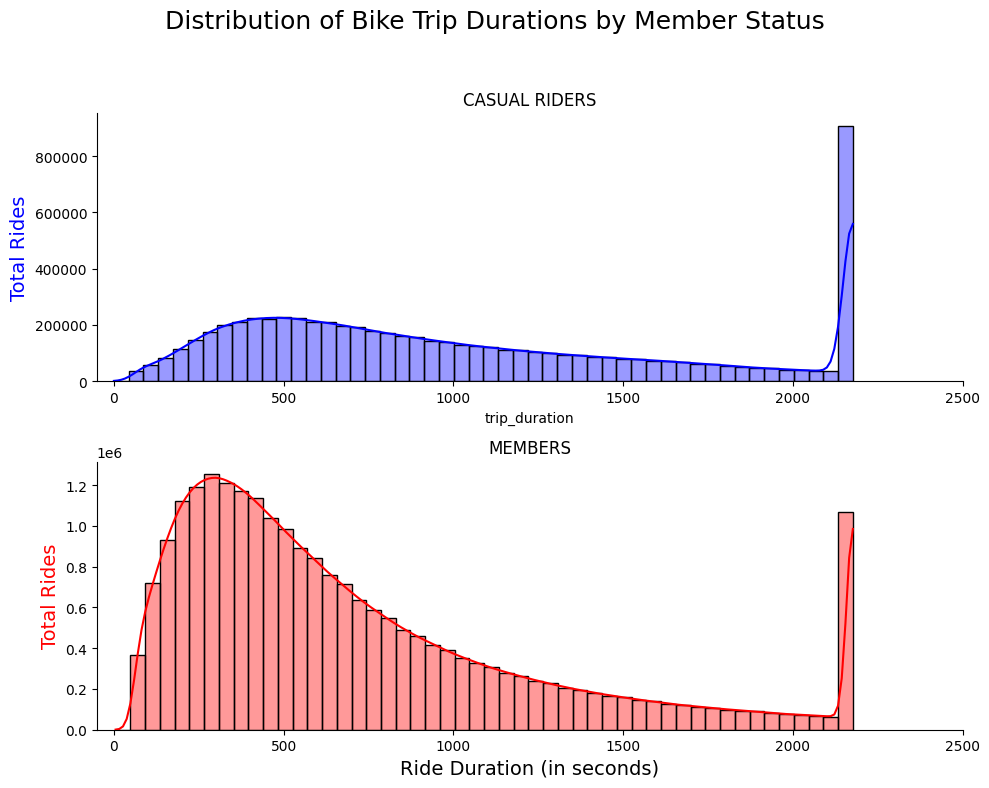

In [21]:
# Pre-filter the data
casual_durations = df_duration.loc[df_duration['member_casual'] == 'Casual', 'trip_duration']
member_durations = df_duration.loc[df_duration['member_casual'] == 'Member', 'trip_duration']

# Create figure and axes objects with subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))

# Plot histogram and KDE for Casual riders
sns.histplot(casual_durations, bins=50, color='blue', alpha=0.4, kde=True, ax=ax1)
ax1.set_xlim([-50, 2500])
ax1.set_ylabel('Total Rides', color='blue', fontsize=14)
ax1.set_title('CASUAL RIDERS')
ax1.spines[['right', 'top']].set_visible(False)

# Plot histogram and KDE for Member riders
sns.histplot(member_durations, bins=50, color='red', alpha=0.4, kde=True, ax=ax2)
ax2.set_xlim([-50, 2500])
ax2.set_xlabel('Ride Duration (in seconds)', fontsize=14)
ax2.set_ylabel('Total Rides', color='red', fontsize=14)
ax2.set_title('MEMBERS')
ax2.spines[['right', 'top']].set_visible(False)

# Adjust layout and set overall title
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, top=0.85)
plt.suptitle('Distribution of Bike Trip Durations by Member Status', fontsize=18)

# Save the figure to a file
plt.savefig('Visualizations/distribution_biketrip_bymemberstatuss.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Double Chart

In [26]:
# Subset the data 
df_doublechart = df[['ride_id', 'rideable_type', 'member_casual']]

In [28]:
# Group the data by 'rideable_type'
df_rideable = df_doublechart.groupby(['rideable_type']).count().reset_index()

In [30]:
# Group the data by 'member_casual'
df_membership = df_doublechart.groupby(['member_casual']).count().reset_index()

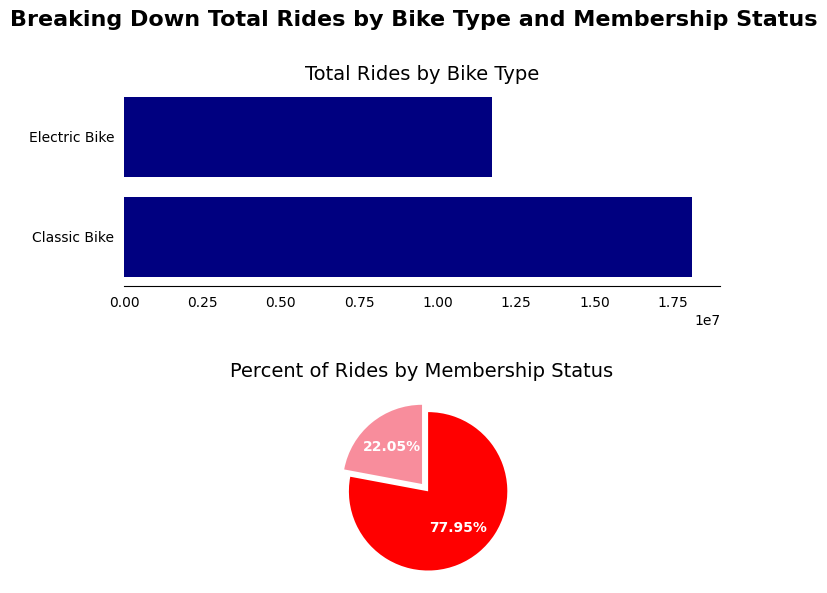

In [32]:
# Create figure and axis objects with subplots() stacked vertically
fig, ax = plt.subplots(2, figsize=(8, 6))

# Plot 1: Total Rides by Bike Type (Horizontal Bar Chart)
ax[0].barh(df_rideable['rideable_type'], df_rideable['ride_id'], color='navy')
ax[0].spines[['right', 'left', 'top']].set_visible(False) 
ax[0].xaxis.set_ticks_position('none')  
ax[0].yaxis.set_ticks_position('none')
ax[0].set_title('Total Rides by Bike Type', fontsize=14)

# Add labels directly to the bar chart
ax[0].bar_label(ax[0].containers[0], fontsize=10, fontweight='bold', padding=3, color='white')

# Plot 2: Percent of Rides by Membership Status (Pie Chart)
colors = ['#F88D9C', 'red']  
explode = [0, 0.12]  

ax[1].pie(
    df_membership['ride_id'], 
    labels=df_membership['member_casual'], 
    startangle=90, 
    colors=colors, 
    autopct='%1.2f%%', 
    textprops={'size': 'medium', 'fontweight': 'bold', 'color': 'white'}, 
    explode=explode
)
ax[1].set_title('Percent of Rides by Membership Status', fontsize=14)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, top=0.85)

# Add overall title
plt.suptitle(
    'Breaking Down Total Rides by Bike Type and Membership Status', 
    fontsize=16, fontweight='bold'
)
# Save the figure to a file
plt.savefig('Visualizations/Nbr_Rides_by_RideType_MemberStatus.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


### Insights: Bike Usage Analysis
#### Trip Durations by Membership Status
**Casual Riders:**
Casual riders likely use bikes for leisure or sightseeing and may be constrained by ride duration caps or pricing.

**Members:**
Predominantly take shorter trips, with most rides under 500 seconds.
Bikes are used for quick commutes or errands as part of their routine.

--- 
#### Total Rides by Bike Type and Membership Status
**Bike Type Usage:**
Classic Bikes are more popular, with over 1.5x the usage compared to Electric Bikes.

*Opportunity: Promote Electric Bikes by highlighting benefits like ease of use for longer rides or challenging terrains.*

**Membership Breakdown:**
Members account for 78% of total rides, while Casual Riders make up 22%.
